# Проект: Принятие решений в бизнесе

**Введение**
<br>Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки крупного интернет-магазина.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
<br>Проект состоит из двух частей:
- Часть 1. Приоритизация гипотез;
- Часть 2. Анализ A/B-теста.

**Часть 1. Приоритизация гипотез.**
<br>В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
<br>Задача:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста.**
<br>Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
<br>Задача:
- Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Построить 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принятье решение по результатам теста и объяснить его. 

### Приоритизация гипотез.

Прежде, чем приступить к работе с гипотезами, необходимо загрузить данные и подготовить их к анализу. Изучим данные и выполним предобработку. 

In [57]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# загружаем данные для первой части

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице всего 9 строк и 5 столбцов, можно оценить качество данных визуально. Пропусков и дубликатов нет. 
<br> Таблица содержит следующие данные:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

In [59]:
# приведем названия столбцов к нижнему регистру и изучим общую информацию

hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Столбцы переименовали. В типах данных проблем нет. 
<br> Приступим к приоритизации гипотез.

In [60]:
# применим фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 
- "Запустить акцию, дающую скидку на товар в день рождения";
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

In [61]:
# применим фреймворк RICE для приоритизации гипотез, отсортируем их по убыванию приоритета

hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа";
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
- "Запустить акцию, дающую скидку на товар в день рождения". 

Гипотезы остались те же, однако порядок их изменился. На первом месте по RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", гипотеза "Запустить акцию, дающую скидку на товар в день рождения" сместилась на последнее место. 
<br> Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оказалась на первом месте, потому что ее показатель охвата пользователей (reach) 10, в то время как у других гипотез он меньше.
<br> В отличие от ICE Score, RICE Score учитывает фактор охвата пользователей, поэтому он более сбалансирован.

### Анализ A/B-теста

Перед тем, как приступить к анализу A/B-теста, загрузим и изучим данные для второй части проекта.

In [62]:
# загружаем данные для второй части

orders, visitors = (
    pd.read_csv('/datasets/orders.csv'),  
    pd.read_csv('/datasets/visitors.csv'),  
)

In [63]:
# изучим данные о orders

orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Пропущенных значений нет. 
<br>Таблица содержит следующие данные:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Приведем названия столбцов к нижнему регистру. Проверим данные на наличие дубликатов и изменим тип данных в date.

In [64]:
# переименуем столбцы

orders = orders.rename(columns = {'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

In [65]:
# проверка на наличие явных дубликатов

orders.duplicated().sum()

0

Дубликатов нет.

In [66]:
# меняем тип данных в date и еще раз вызовем info для проверки

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Предобработку с таблицей orders закончили. Теперь изучим информацию о visitors.

In [67]:
# изучим данные о visitors

visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В таблице содержаться следующие данные:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Пропущенных значений нет. Наименование столбцов в порядке. Проверим данные на наличие дубликатов и изменим тип данных в date.

In [68]:
# проверка на наличие явных дубликатов

visitors.duplicated().sum()

0

Дубликатов нет.

In [69]:
# меняем тип данных в date и еще раз вызовем info для проверки

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Предобработка таблицы visitors закончена, можно приступать к анализу A/B-теста.

In [70]:
# построим график кумулятивной выручки по группам
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates() 

In [71]:
# получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis = 1,
).sort_values(by = ['date', 'group'])

In [72]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis = 1,
).sort_values(by = ['date', 'group'])

In [73]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [74]:
# проверим сколько у нас уникальных visitor id в таблице orders

print(orders['visitor_id'].nunique())

1031


In [75]:
# сравним это значение с количеством уникальных visitor id в orders, сгруппированных по группам

print(orders.groupby('group')['visitor_id'].nunique())

group
A    503
B    586
Name: visitor_id, dtype: int64


В таблице orders 1031 уникальных visitor id. Количество уникальных visitor id в orders в группе 'А' - 503, 'В' - 586, всего 1089. 58 Покупателей повторяются в группах

In [76]:
# сохраним данные о пользователях, вошедших в группу A и B, в отдельные датафреймы,
# затем объединим их в один датафрейм и удалим дубликаты по столбцу visitorid:
 
A = orders[orders['group'] == 'A']
B = orders[orders['group'] == 'B']
orders = pd.concat([A, B]).drop_duplicates(subset = 'visitor_id').reset_index(drop=True)
print(orders[orders['group'] == 'A'].count())
print(orders[orders['group'] == 'B'].count())
orders

transaction_id    503
visitor_id        503
date              503
revenue           503
group             503
dtype: int64
transaction_id    528
visitor_id        528
date              528
revenue           528
group             528
dtype: int64


,transaction_id,visitor_id,date,revenue,group
0,2961555356,4069496402,2019-08-15,400,A
1,2626614568,78758296,2019-08-15,1044,A
2,1576988021,295230930,2019-08-15,13710,A
3,3649131742,879864040,2019-08-15,4008,A
4,2809384911,3213223594,2019-08-15,7370,A
...,...,...,...,...,...
1026,2116724386,2146711261,2019-08-14,15380,B
1027,38478481,1197745035,2019-08-14,8600,B
1028,3592955527,608641596,2019-08-14,16490,B
1029,2662137336,3733762160,2019-08-14,6490,B


Пересечения исключили. После этого изменились результаты дальнейших анализов

In [77]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]

In [78]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

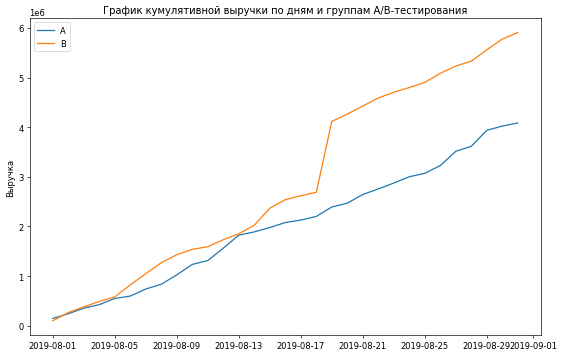

In [79]:
# строим график кумулятивной выручки по группам

plt.figure(figsize = (11, 7), dpi = 60)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A') # график выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B') # график выручки группы B
plt.title('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.ylabel('Выручка')
plt.legend();

Выручка увеличивается в течение всего теста в обоих группах. Для группы А рост равномерный. На графике группы В наблюдается резкий всплеск. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

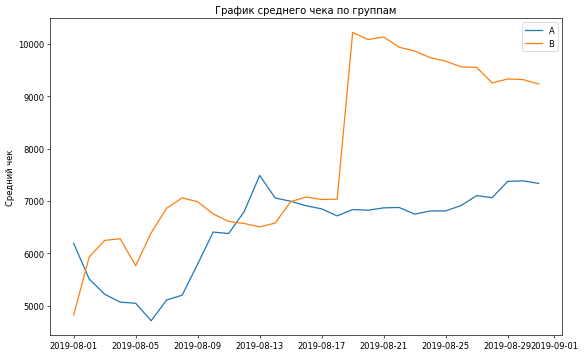

In [80]:
# построим графики среднего чека по группам

plt.figure(figsize = (11, 7), dpi = 60)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')
plt.title('График среднего чека по группам')
plt.ylabel('Средний чек')
plt.legend();

Средний чек в обоих группах имеет неравномерный рост с резкими всплесками и падениями. Ближе к концу графика для группы А начинается равномерный рост после падения, для группы В после резкого всплеска наблюдается равномерный спад. Всплески на графиках могут быть связанны с крупными заказами, которые попали в группу.

In [81]:
# построим график относительного различия для среднего чека
# собираем данные в одном датафрейме

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B']
)

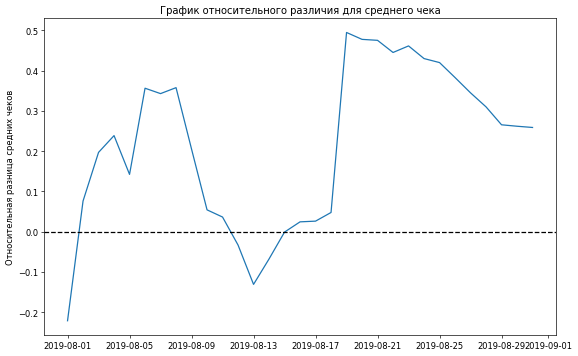

In [82]:
# cтроим отношение средних чеков

plt.figure(figsize = (11, 7), dpi = 60)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / 
                                           mergedCumulativeRevenue['ordersB']) / 
                                          (mergedCumulativeRevenue['revenueA'] / 
                                           mergedCumulativeRevenue['ordersA']) - 1)
plt.title('График относительного различия для среднего чека')
plt.ylabel('Относительная разница средних чеков')
plt.axhline(y=0, color='black', linestyle='--'); # добавляем ось X

В нескольких точках график различия между сегментами резко «скачет», можно предположить, что в данных есть крупные заказы и выбросы.

In [83]:
# построим график кумулятивного среднего количества заказов по группам
# считаем кумулятивную конверсию

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [84]:
# отделяем данные по группе A

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

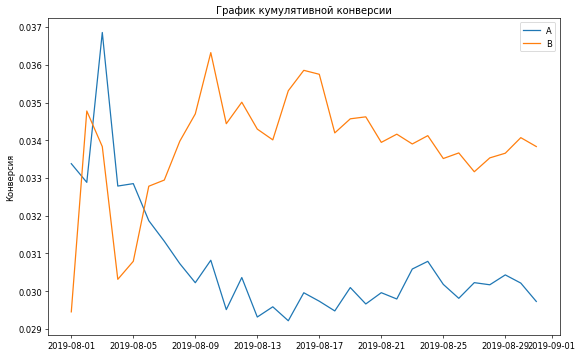

In [85]:
# строим графики

plt.figure(figsize = (11, 7), dpi = 60)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии')
plt.ylabel('Конверсия')
plt.legend();

У групп наблюдается резкий скачок около одного значения, после которого последовал резкий спад. После спада у группы В был еще один скачок, после которого график начал выравниваться. Группа А продолжила падать, после чего наблюдается незначительный рост.

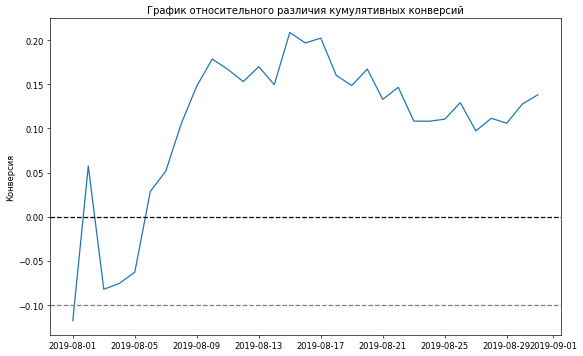

In [86]:
# построим график относительного различия кумулятивных конверсий

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on = 'date', right_on = 'date', how = 'left', 
                                                                           suffixes = ['A', 'B'])
plt.figure(figsize = (11, 7), dpi = 60)
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного различия кумулятивных конверсий')
plt.ylabel('Конверсия')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = -0.1, color = 'grey', linestyle = '--');

В начале теста наблюдаются резкие всплески и падения группы В, но потом конверсия отностильно выровнялась и после просадки растет.

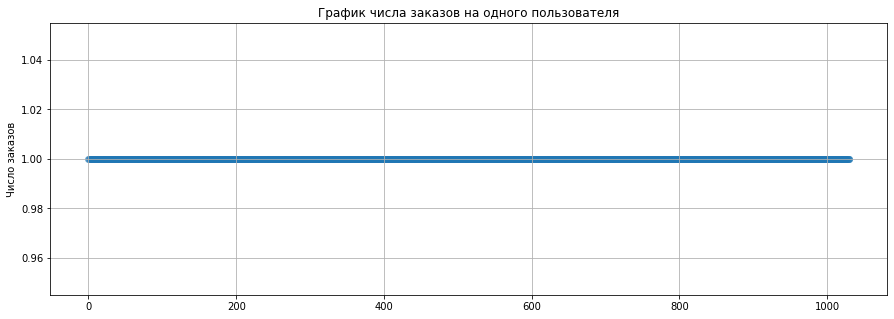

In [87]:
# построим точечную диаграмму числа заказов на одного пользователя

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График числа заказов на одного пользователя')
plt.ylabel('Число заказов')
plt.scatter(x_values, ordersByUsers['transaction_id'], alpha=0.5);

Большинство покупателей заказывали только один раз.

In [88]:
# посчитаем выборочные перцентили количества заказов на одного пользователя

print('95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['transaction_id'], [95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [1. 1.]


Не более 5% пользователей совершали больше 1 заказов. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

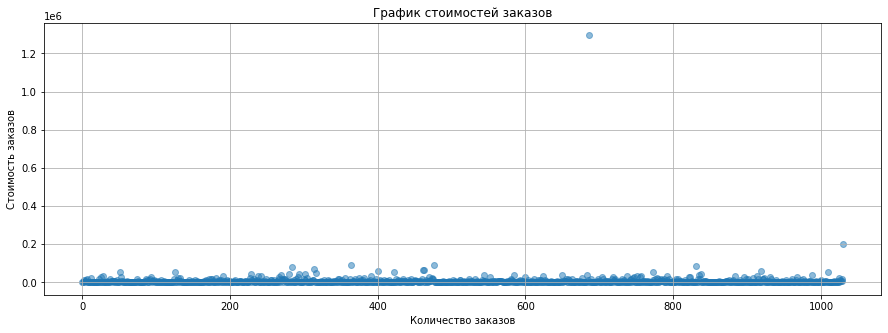

In [89]:
# построим точечную диаграмму стоимости заказов

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

На графике есть выбросы с 'revenue' большим 199000, отбросим их и посторим диаграмму еще раз.

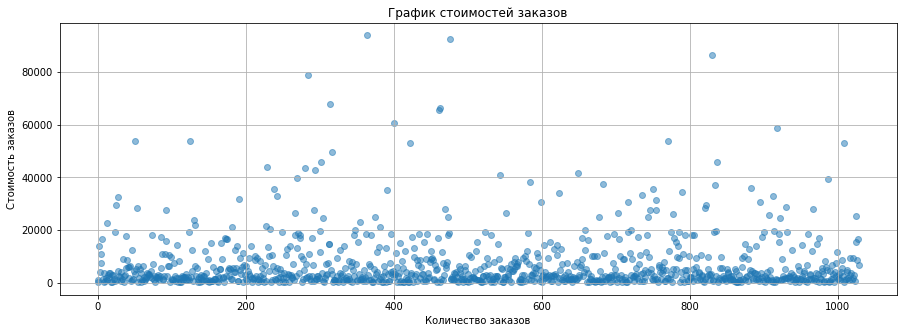

In [90]:
norm_orders = orders[orders['revenue'] <= 199000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize = (15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов')
plt.scatter(xn_values, norm_orders, alpha = 0.5);

Большая часть заказов не дороже 40000. Чтобы точнее определеить границу аномальной стоимости заказа рассчитаем 95-й и 99-й перцентили.

In [91]:
# посчитаем выборочные перцентили стоимости заказов

print('95-й и 99-й перцентили стоимости заказов:', np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й перцентили стоимости заказов: [27575.  57156.2]


Не более 5% заказов дороже 27575. И не более 1% - дороже 57156. Примем 30000 за верхнюю границу стоимости заказов.

In [92]:
# посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным,
# для этого соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу:
# создадим несколько таблиц и затем объединим их

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [93]:
# объединяем таблицы

data = ordersADaily.merge(ordersBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,128910,17,59758,20,128910,17,59758,719,713,719,713
1,2019-08-02,18,76715,22,159293,38,205625,39,219051,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,62,318098,53,286100,507,509,1845,1803
3,2019-08-04,12,61395,13,84340,74,379493,66,370440,717,770,2562,2573
4,2019-08-05,22,102933,21,89908,96,482426,87,460348,756,707,3318,3280


In [94]:
# cоздадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'],
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index = False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index = False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [95]:
# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')],axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders')],axis = 0)

Сформулируем гипотезы:
<br>H₀ - статистически значимых различий в конверсии между группами нет; 
<br>H₁ - статистически значимые различия есть.

In [96]:
# применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean() / sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.526
Относительный показатель 'B' и 'A' = 0.040


По «сырым» данным нет различий в конверсии групп A и B: p-value (0.526) больше alpha (0.05). Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - принимаем. Относительный проигрыш группы 'A' равен 0.04%.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сформулируем гипотезы:
<br>H₀ - статистически значимых различий в средних чеках между группами нет; 
<br>H₁ - статистически значимые различия есть.

In [97]:
# считаем статистическую значимость различий в среднем чеке заказа

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.660
Относительный показатель 'B' и 'A' = 0.274


P-value 0.729 больше 0.05, значит различий по «сырым» данным нет, нулевая гипотеза подтвердилась. Относительный проигрыш группы 'A' ~27%

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. 
<br>В прошлых пунктах установили границы аномальных значений: пользователи, оформившие больше 2 покупок или заказ на сумму более 30000 признаются аномальными. Создадим таблицу, из которой исключим аномальные значения.

In [98]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis = 0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', len(abnormalUsers)) 

Количество аномальных пользователей: 44


In [99]:
# посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным,
# сначала подготовим выборки количества заказов по пользователям по группам теста

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы:
<br>H₀ - статистически значимых различий в конверсии между группами нет;
<br>H₁ - статистически значимые различия есть.

In [100]:
# применим статистический критерий Манна-Уитни к полученным выборкам

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)) 

alpha = 0.05
p-value = 0.554
Относительный показатель 'B' и 'A' = 0.038


Нулевую гипотезу отвергаем, по «очищенным» данным различия в конверсии групп 'A' и 'B' отсутсвуют: p-value (0.554) больше alpha (0.05). Относительный выигрыш группы 'B' равен 0.038% (почти такой же, как по «сырым» данным - 0.04%).

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сформулируем гипотезы:
<br>H₀ - статистически значимых различий в средних чеках между группами не;
<br>H₁ - статистически значимые различия есть.

In [101]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.613
Относительный показатель 'B' и 'A' = -0.042


Нулевая гипотеза подтвердилась, различий в среднем чеке нет: p-value (0.720) больше alpha (0.05). Относительный выигрыш группы 'A' 0.042%, в то время как по «сырым» данным относительный проигрыш группы 'A' ~27%. Причина - в «сырых» данных был аномальный заказ на большую сумму.

**По результатам тестирования:**
- нет различий в конверсии групп по «сырым» и по «очищенным» данным, относительный выигрыш группы 'B' над 'A' равен 0.038% по «очищенным» и 0.04% по «сырым» данным.
- различия в средних чеках групп A и B по «сырым» и по «очищенным» данным отстутствуют, несмотря на то, что относительный выигрыш группы 'A' по «очищенным» данным составил 0.042%, в то время как по «сырым» данным относительный проигрыш группы 'A' ~27%. После исключения из групп аномальных значений средний чек сравнялся.

Результаты тестирования вполне однозначны. В итоге можно принять решение остановить тестирование и констатировать успех и победу группы 'B'. Группа 'B' значительно эффективнее группы 'A' по конверсии, хотя по среднему чеку группы примерно равны.

### Вывод

**По результатам части 1:**
- наиболее перспективные гипотезы по ICE:
  - "Запустить акцию, дающую скидку на товар в день рождения";
  - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
  - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
  - "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию";
- наиболее перспективные гипотезы по RICE: 
  - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
  - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа";
  - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
  - "Запустить акцию, дающую скидку на товар в день рождения". 

Гипотезы остались те же, однако порядок их изменился. На первом месте по RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", гипотеза "Запустить акцию, дающую скидку на товар в день рождения" сместилась на последнее место.
Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оказалась на первом месте, потому что ее показатель охвата пользователей (reach) 10, в то время как у других гипотез он меньше.
В отличие от ICE Score, RICE Score учитывает фактор охвата пользователей, поэтому он более сбалансирован.

**По результатм части 2:**
- нашли и установили границы аномальных значений: пользователи, оформившие больше 2 покупок или заказ на сумму более 30000 признаются аномальными;
- нет различий в конверсии групп по «сырым» и по «очищенным» данным, относительный выигрыш группы 'B' над 'A' равен 0.038% по «очищенным» и 0.04% по «сырым» данным;
- различия в средних чеках групп A и B по «сырым» и по «очищенным» данным отстутствуют, несмотря на то, что относительный выигрыш группы 'A' по «очищенным» данным составил 0.042%, в то время как по «сырым» данным относительный проигрыш группы 'A' ~27%. После исключения из групп аномальных значений средний чек сравнялся.

Результаты тестирования вполне однозначны. В итоге можно принять решение остановить тестирование и констатировать успех и победу группы 'B'. Группа 'B' значительно эффективнее группы 'A' по конверсии, хотя по среднему чеку группы примерно равны.